# Pymaceuticals Capomulin effects on Squamous Cell Carcinoma progression

Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

![Laboratory](Images/Laboratory.jpg)

In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. The executive team also has asked for a top-level summary of the study results.

## Summary of study results

* The Drug regimen of Capomulin was effective in reducing the average SCC tumor volume in mice over a 45 day period. It would be interesting to continue the study past 45 days to see if the tumor would be completely ablated.  
![LineChart](figures/LineChart.png)

* The number of data points for each Drug Regimen were all above 100 - usually statistical significance is obtained with a sample size of 30 or greater.![BarChart](figures/PandaBarChart.png)

.

* The study had a near identical number of male and female mice. Determining if sex of the mouse was correlated to efficacy would be interesting to look at.![PieChart](figures/PandaPieChart.png)

* Based on average final tumor volume both Capomulin and Ramicane appeared to be equally effective, but to be sure of this we would need to make sure the starting tumor volumes were equivalent. Of these four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier data point - the rest were "well behaved" with the datasets not having any outliers.![BoxWhiskerPlot](figures/BoxWhiskerPlot.png)

* Mouse weight correlated strongly (R-squared of 0.84) with average tumor volume. Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of efficacy.
![LineChart](figures/ScatterWeightTumorVolRegression.png)



### Import dependencies to be used in this notebook

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

### Import data from .csv files into pandas dataframes

In [2]:
# Import study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results into a pandas dataframe
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

### Look at the data using .head() and plotting a histogram to see what we are dealing with

In [3]:
# View the dataframe
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# View the dataframe
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


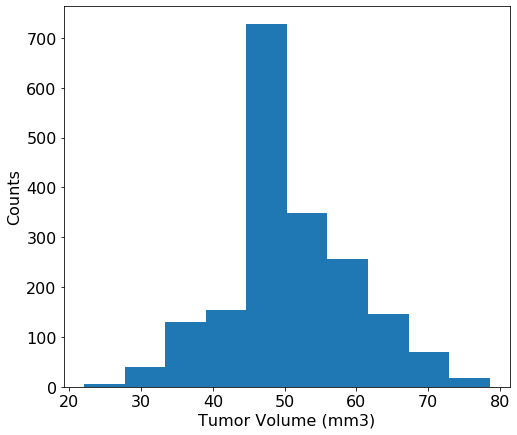

Mean of the study results is: 50.45
Median of the study results is: 48.95
Mode of the study results is: 0    45.0
dtype: float64
NormaltestResult(statistic=5.627666860467887, pvalue=0.05997464255141077)


In [27]:
# Plot the data for the study results as a histogram and test it to see if it is normally distributed
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(study_results['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(study_results['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(study_results['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

### Combine the two dataframes into one and view the info to see if we need to clean the data

In [6]:
# Merge our two data frames together
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Review the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


#### .info() shows us that all the columns have the same number of values and they are of the right types

# Summary statistics
Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [7]:
# Generate a summary statistics table by chaining .groupby(), .agg() and .round() methods

drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


# Bar plots
Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  * **NOTE:** These plots should look identical.

## Panda's .plot bar graph

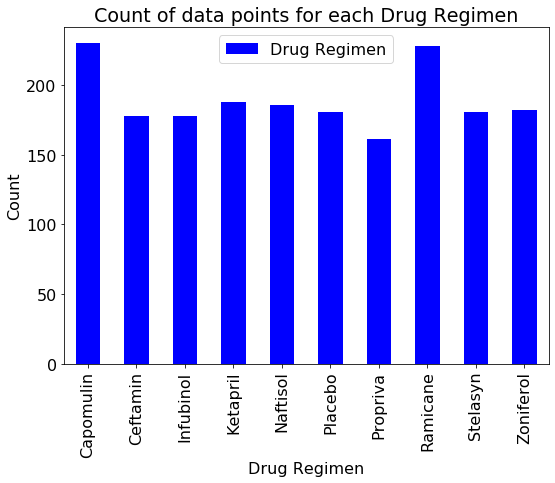

In [53]:
# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = combined_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
plt.savefig("figures/PandaBarChart.png")

plt.show()




## Matplotlib pyplot bar chart method

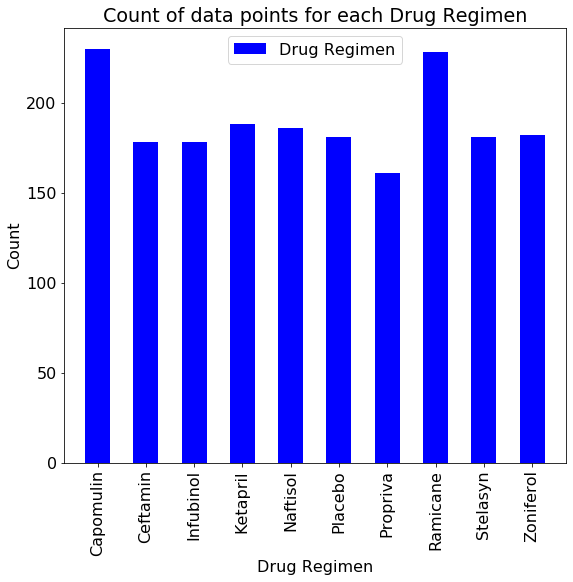

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig("figures/PyplotBarChart.png")
plt.show()



# Pie plots
Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

In [10]:
# First create a dataframe grouping by the 'Sex' column
gender_group = combined_data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()


,Sex
Sex,
Female,935
Male,958


## Panda's .plot pie chart

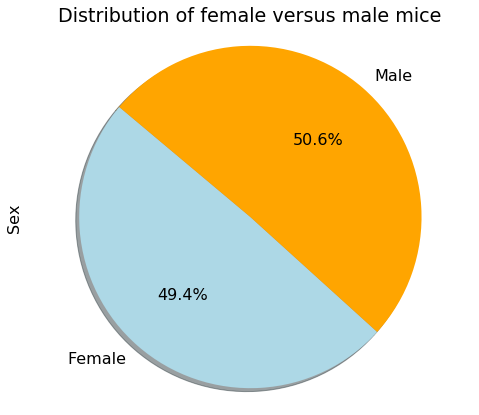

In [30]:
# Create a pie chart based off of the group series from before
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()

## Matplotlib pyplot pie chart

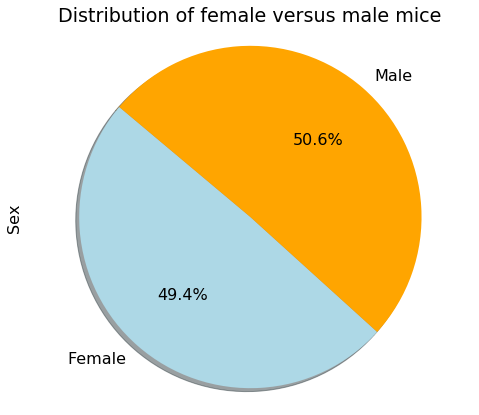

In [31]:
# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

# Quartiles and outliers
Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

### Prepare a dataframe with the four drugs of interest as columns with values of the final tumor volume of each mouse

In [13]:
# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [15]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [16]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


# Box and whisker plots
Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

In [17]:
# Create list of lists containing each column in transposed table simultaneously removing NaN values

# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

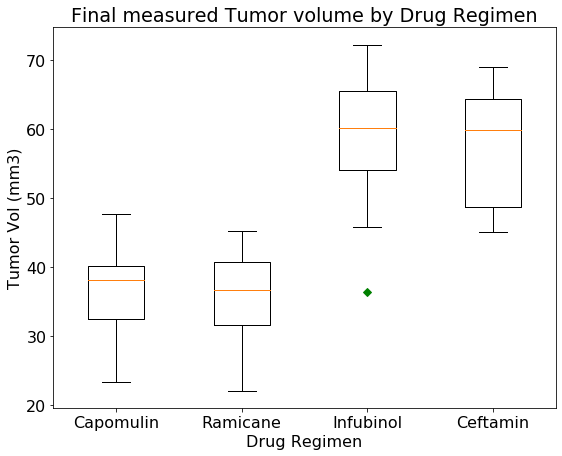

In [32]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)

# Save the figure
plt.savefig("figures/BoxWhiskerPlot.png")

plt.show()



# Line plot of effectiveness of Capomulin to reduce tumor volume over time
Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

In [19]:
# Create a dataframe for only the Capomulin data
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [20]:
# Groupby timepoint and then get the mean of the tumor volume and 
# sem just for kicks (since no scientist would plot a line graph without error bars)

cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# View the groupby dataframe 
cap_time_tumor.head(10)


,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


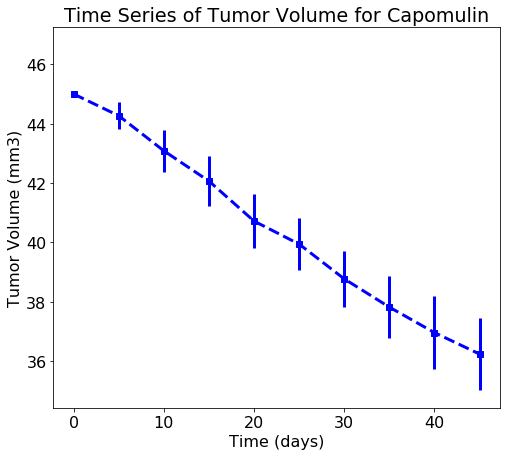

In [33]:
# Plot a line plot using error bars

# get the values for the x axis
time_series = list(cap_time_tumor.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time_series,  # X values
    cap_time_tumor['Tumor_Vol_Mean'], # Y values
    yerr=cap_time_tumor['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
plt.savefig("figures/LineChart.png")

plt.show()



# Scatter Plot of mouse weight vs. Avg Tumor Volume
Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [22]:
# View Capomulin dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [23]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


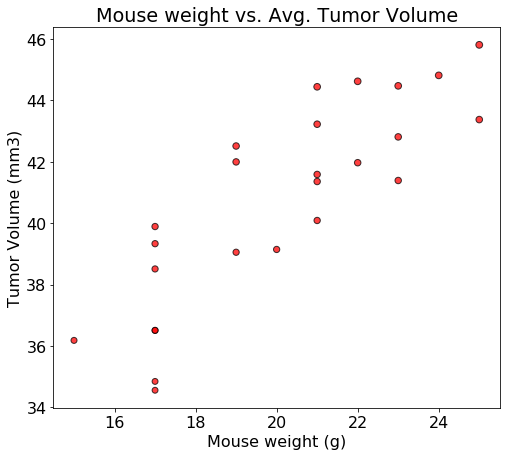

In [34]:
#create scatter plot from the above dataframe
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
plt.savefig("figures/ScatterWeightTumorVol.png")

plt.show()



# Correlation coefficient and linear regression
Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


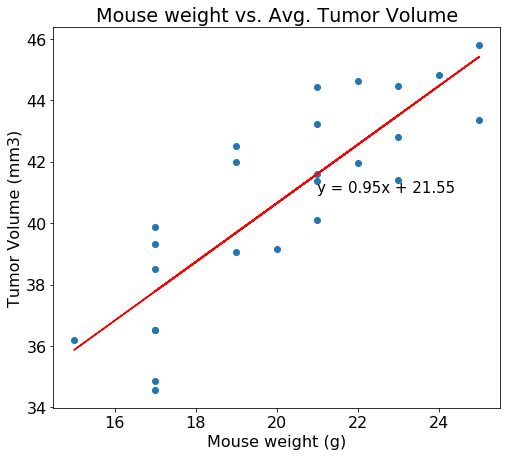

In [64]:
# Print out the r-squared value along with the plot.
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,41),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
plt.savefig("figures/ScatterWeightTumorVolRegression.png")

plt.show()




* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
